**Course website**: http://lagex.github.io/geofisica2

**Note**: This notebook is part of the course "Geofísica 2" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [IPython notebook](http://ipython.org/notebook.html). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (que pode ser números, texto, figuras, videos, etc).

# Prática 1 - Ondas sísmicas

Vamos explorar como as ondas sísmicas P e S se comportam, tanto em meios homogêneos como quando há uma interface entre dois meios. Para isso, vamos utilizar as simulações de ondas da biblioteca [Fatiando a Terra](http://www.fatiando.org). Essas simulações utilizam o [método de diferenças finitas](http://en.wikipedia.org/wiki/Finite_difference_method) para calcular soluções da equação da onda.

As tarefas abaixo acompanham as questões que vocês devem responder. Usem as simulações abaixo para te ajudar a responder as perguntas.

## Preparação

Rode a célula abaixo para carregar as componentes necessárias para fazer as simulações. Não se preocupe se aparecer um `:0: FutureWarning: IPython widgets are experimental and may change in the future.` abaixo. Isso é consequência de utilizar tecnologia de ponta.

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from fatiando import utils
from fatiando.seismic.wavefd import Ricker, ElasticPSV, ElasticSH
from fatiando.vis import mpl
import fatiando

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
print(fatiando.__version__)

0.3-193-ga08a1fe-dirty


## Frentes de onda

Vamos simular uma onda P (esqueçam as ondas S por enquanto). Primeiro vamos ver como ela se comporta em um meio homogêneo, sem camadas.

Rode a célula abaixo para criar um modelo da subsuperfície homogêneo.

In [3]:
shape = (300, 400)
spacing = 10
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
velocidade = np.ones(shape)*3000
densidade = np.ones(shape)*2200

Agora vamos criar o nosso simulador de ondas.

In [4]:
sim1 = ElasticSH(velocidade, densidade, spacing=spacing, taper=0.005)

e colocar uma fonte explosiva na superfície.

In [5]:
sim1.add_point_source((0, shape[1]//2), Ricker(5, 20, 1/20))

Agora que temos nossa simulação pronta, rode a célcula abaixo para avançar a simulação 400 passos no tempo.

In [6]:
sim1.run(400)

|##################################################|100% Ran 400 iterations in 9.32077 seconds.

Quando a barra acima encher, rode a célula abaixo para gerar uma animação da propagação da onda. Isso pode demorar um pouco. A parte de cima da figura é a superfície.

In [7]:
sim1.animate(every=10, embed=True, dpi=50, cutoff=0.001)

Rode a próxima célula para explorar fotos de cada etapa da simulação, uma de cada vez.

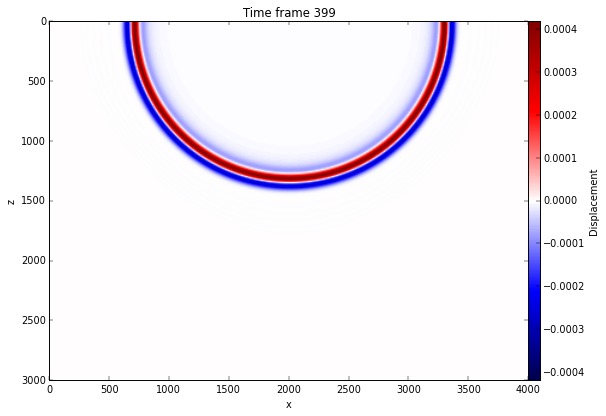

<function fatiando.seismic.wavefd.plot>

In [8]:
sim1.explore(every=20)

## Nota

Se quiser continuar a simulação e avançá-la mais no tempo, rode novamente a célula `sim1.run(400)` para avançar mais 400 iterações. Depois, rode novamente a célula que cria a animação e ela será atualizada.

## Onda P incidindo em uma interface (simplificado)

Agora que vocês visualizaram a frente de onda, vamos ver o que acontece quando a subsuperfície contem duas camadas. A simulação abaixo considera **somente ondas P e ignora ondas S**. 

Vamos fazer um modelo com a camada de vaixo mais densa e com velocidade maior. A interface está localizada a 1000m de profundidade.

In [9]:
densidade = np.ones(shape)*2200
velocidade = np.ones(shape)*3000
l1 = 100
densidade[l1:,:] = 2400
velocidade[l1:,:] = 4000

Novamente, crie a simulação adicione uma fonte explosiva no topo.

In [10]:
sim2 = ElasticSH(velocidade, densidade, spacing=spacing, taper=0.005)
sim2.add_point_source((0, shape[1]//2), Ricker(5, 20, 1/20))

Rode a simulação por 600 iterações.

In [11]:
sim2.run(600)

|##################################################|100% Ran 600 iterations in 14.5672 seconds.

Gere a animação abaixo. O que acontece quando a frente de onda chega na interface?

In [12]:
sim2.animate(every=10, embed=True, dpi=50, cutoff=0.001)

Rode abaixo para ver cada tempo separado, com calma.

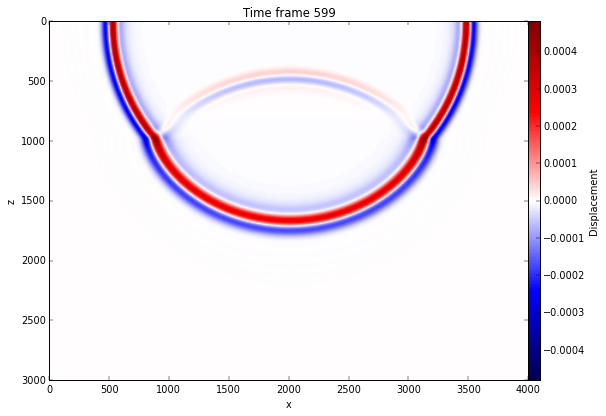

<function fatiando.seismic.wavefd.plot>

In [13]:
sim2.explore(every=20)

A célula abaixo **não precisa ser rodada**. Ela somente gera a figura que está no questionário. Para vocês verem que eu não roubei e fiz a figura no Paint.

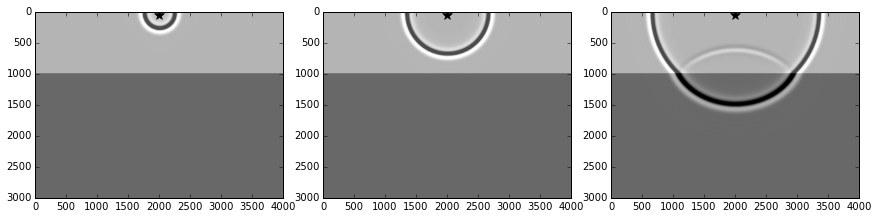

In [14]:
fig, axes = mpl.subplots(1, 3)
for f, ax in zip([150, 300, 550], axes):
    frame = sim2[f,:,:]
    ranges = 0.5*np.abs([frame.min(), frame.max()]).max()
    ax.imshow(frame, extent=extent, cmap=mpl.cm.Greys, vmin=-ranges, vmax=ranges)
    ax.imshow(velocidade, extent=extent, alpha=0.3, cmap=mpl.cm.Greys)
    ax.plot(spacing*sim2.sources[0][0][1], 50 + spacing*sim2.sources[0][0][0], '*k', markersize=10)
ax.set_xlim(extent[:2])
fig.set_size_inches(12, 3.5)
fig.tight_layout(pad=0)
fig.savefig('../_static/img/ondas-sismicas-tarefa-raios.png')

## Ondas P e ondas S

Vamos fazer uma simulação mais realista agora que inclui tanto ondas P quanto ondas S.

Para isso, precisamos definir qual é a velocidade de cada uma das ondas. Note que a onda P é mais rápida que a S.

In [15]:
dens = np.ones(shape)*2200
vs = np.ones(shape)*3000
vp = np.ones(shape)*4000

Rode a célula abaixo para criar a simulação de ondas P e S. Dessa vez, **não vamos usar uma fonte explosiva**. A fonte será um **puxão com mergulho de 45 graus**. A fonte será localizada em profundidade a 1500m. 

In [16]:
sim3 = ElasticPSV(vp, vs, dens, spacing=spacing)
sim3.add_point_source((shape[0]//2, shape[1]//2), dip=45, wavelet=Ricker(5, 20, 1/20))

Agora, avance a simulação 400 iterações no tempo. 

In [17]:
sim3.run(400)

|##################################################|100% Ran 400 iterations in 16.7198 seconds.

E gere a animação. Note que essa é diferente da outra. Agora, há vetores na imagem além das frentes de onda coloridas. **Os vetores representam a direção e intensidade das vibrações em todo o espaço**. Os pontos são vetores com tamanho zero. Note que no começo da animação aparece um vetor bem grande no centro. Esse vetor representa a fonte da onda, um puxão na direção de 45 graus.

Tente achar as ondas P e as S. Qual frente de onda é mais rápida? Qual é a direção de propagação de cada uma? E a direção das vibrações?

In [18]:
sim3.animate(every=10, plottype=['vectors', 'wavefield'], scale=150, dpi=70, embed=True)

Novamente, use a célula abaixo para ver cada etapa da simulação separadamente.

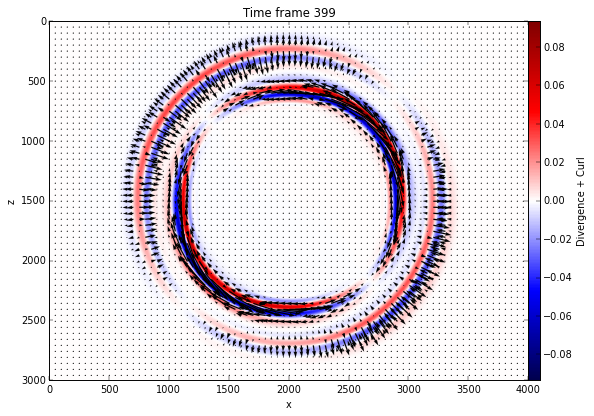

<function fatiando.seismic.wavefd.plot>

In [19]:
sim3.explore(every=20, plottype=['vectors', 'wavefield'], scale=150)

A célula abaixo **não precisa ser rodada**. Ela somente gera a figura que está no questionário.

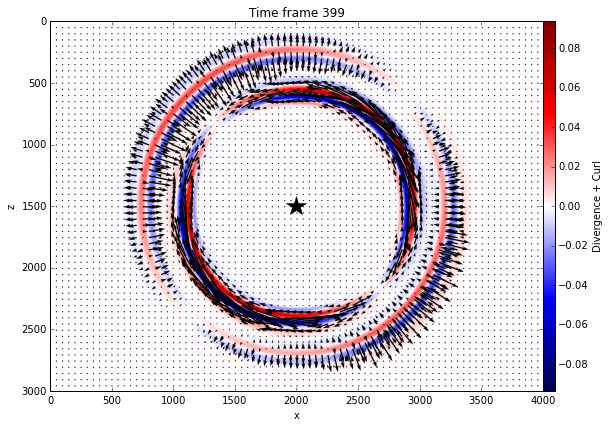

In [20]:
fig = mpl.figure()
ax = mpl.subplot(111)    
ax.plot(spacing*sim3.sources[0][0][1], spacing*sim3.sources[0][0][0], '*k', markersize=20)
sim3.snapshot(-1, plottype=['vectors', 'wavefield'], every_particle=5, scale=200, ax=ax)
fig.savefig('../_static/img/ondas-sismicas-tarefa-p-s.png')

## Onda P incidindo em uma interface (completo)

Agora que vocês acharam as ondas P e S, vamos fazer a simulação completa do que acontece quando uma onda P encontra uma interface.

Rode a célula abaixo para criar um modelo com dois meios com velocidades diferentes. A interface entre os dois meios está a 1000m.

In [21]:
dens = np.ones(shape)*2000
vs = np.ones(shape)*2500
vp = np.ones(shape)*4000
l = 150
dens[l:, :] = 2400
vs[l:, :] = 3500
vp[l:, :] = 5000

A simulação que vamos fazer agora usa uma **fonte explosiva**.  Esse tipo de fonte gera **somente ondas P**. Vamos ver o que acontece quando essa onda encontra a interface. Para variar um pouco, vamos colocar a fonte no fundo do nosso modelo.

In [22]:
sim4 = ElasticPSV(vp, vs, dens, spacing)
sim4.add_blast_source((3*shape[0]//4, shape[1]//2), Ricker(5, 20, 1/20))

Agora, avance a simulação.

In [23]:
sim4.run(700)

|##################################################|100% Ran 700 iterations in 26.8957 seconds.

E gere a animação. Note que no começo há somente ondas P (pergunta, como você sabe que são só ondas P?).

In [24]:
sim4.animate(every=10, plottype=['vectors', 'wavefield'], cutoff=0.05, every_particle=6, scale=150, dpi=70, embed=True)

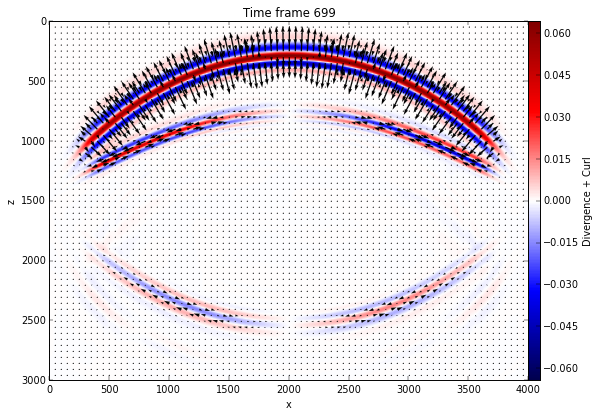

<function fatiando.seismic.wavefd.plot>

In [25]:
sim4.explore(every=20, plottype=['vectors', 'wavefield'], scale=150)

### Curiosidade extra

Avance a simulação no tempo novamente e atualize a animação. O que acontece quando a onda P reflete na superfície?

A célula abaixo **não precisa ser rodada**. Ela somente gera a figura que está no questionário.

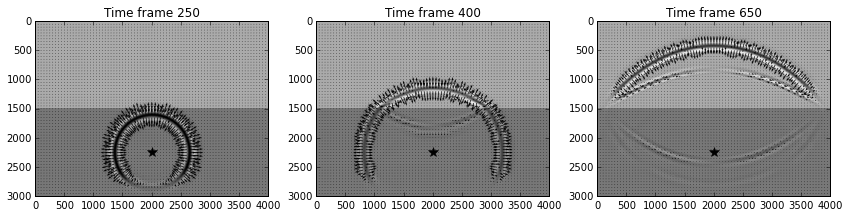

In [26]:
fig, axes = mpl.subplots(1, 3)
for f, ax in zip([250, 400, 650], axes):
    sim4.snapshot(f, plottype=['vectors', 'wavefield'], every_particle=5, scale=100, ax=ax, cmap=mpl.cm.Greys)
    fig.delaxes(fig.axes[-1])
    ax.imshow(vs, extent=extent, alpha=0.2, cmap=mpl.cm.Greys)
    ax.plot(spacing*sim4.sources[0][0][1], spacing*sim4.sources[0][0][0], '*k', markersize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.set_size_inches(12., 3.5)
fig.tight_layout(pad=0, w_pad=0)
fig.savefig('../_static/img/ondas-sismicas-tarefa-raios-p-s.png')